# Classify mushrooms on whether they are edible or poisonous

### Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ''leaflets three, let it be'' for Poisonous Oak and Ivy.

### Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

https://archive.ics.uci.edu/ml/datasets/mushroom

In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_val_predict ,GridSearchCV
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, plot_roc_curve, plot_precision_recall_curve

In [2]:
df_mushrooms = pd.read_csv("mushrooms.csv")

In [3]:
df_mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df_mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df_mushrooms["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

**&rarr; Balanced**

In [6]:
nans = 0
for col in df_mushrooms:
    s = df_mushrooms.loc[:,col].str.count("\?")
    if s.any():
        nans += s.sum() 

In [7]:
df_mushrooms.isna().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [8]:
nans / len(df_mushrooms)

0.3052683407188577

**&rarr; ~31% missing values, don't drop, replace and later impute**

In [9]:
df_mushrooms.replace("?", np.nan, inplace=True)

In [10]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for ix_train, ix_test in splitter.split(df_mushrooms, df_mushrooms["class"]):
    df_train = df_mushrooms.loc[ix_train]
    df_test = df_mushrooms.loc[ix_test]

# df_X = df_mushrooms.drop(["class"], axis=1)
# df_y = df_mushrooms["class"]

# X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=42)

In [11]:
for col in df_mushrooms:
    print(col)

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


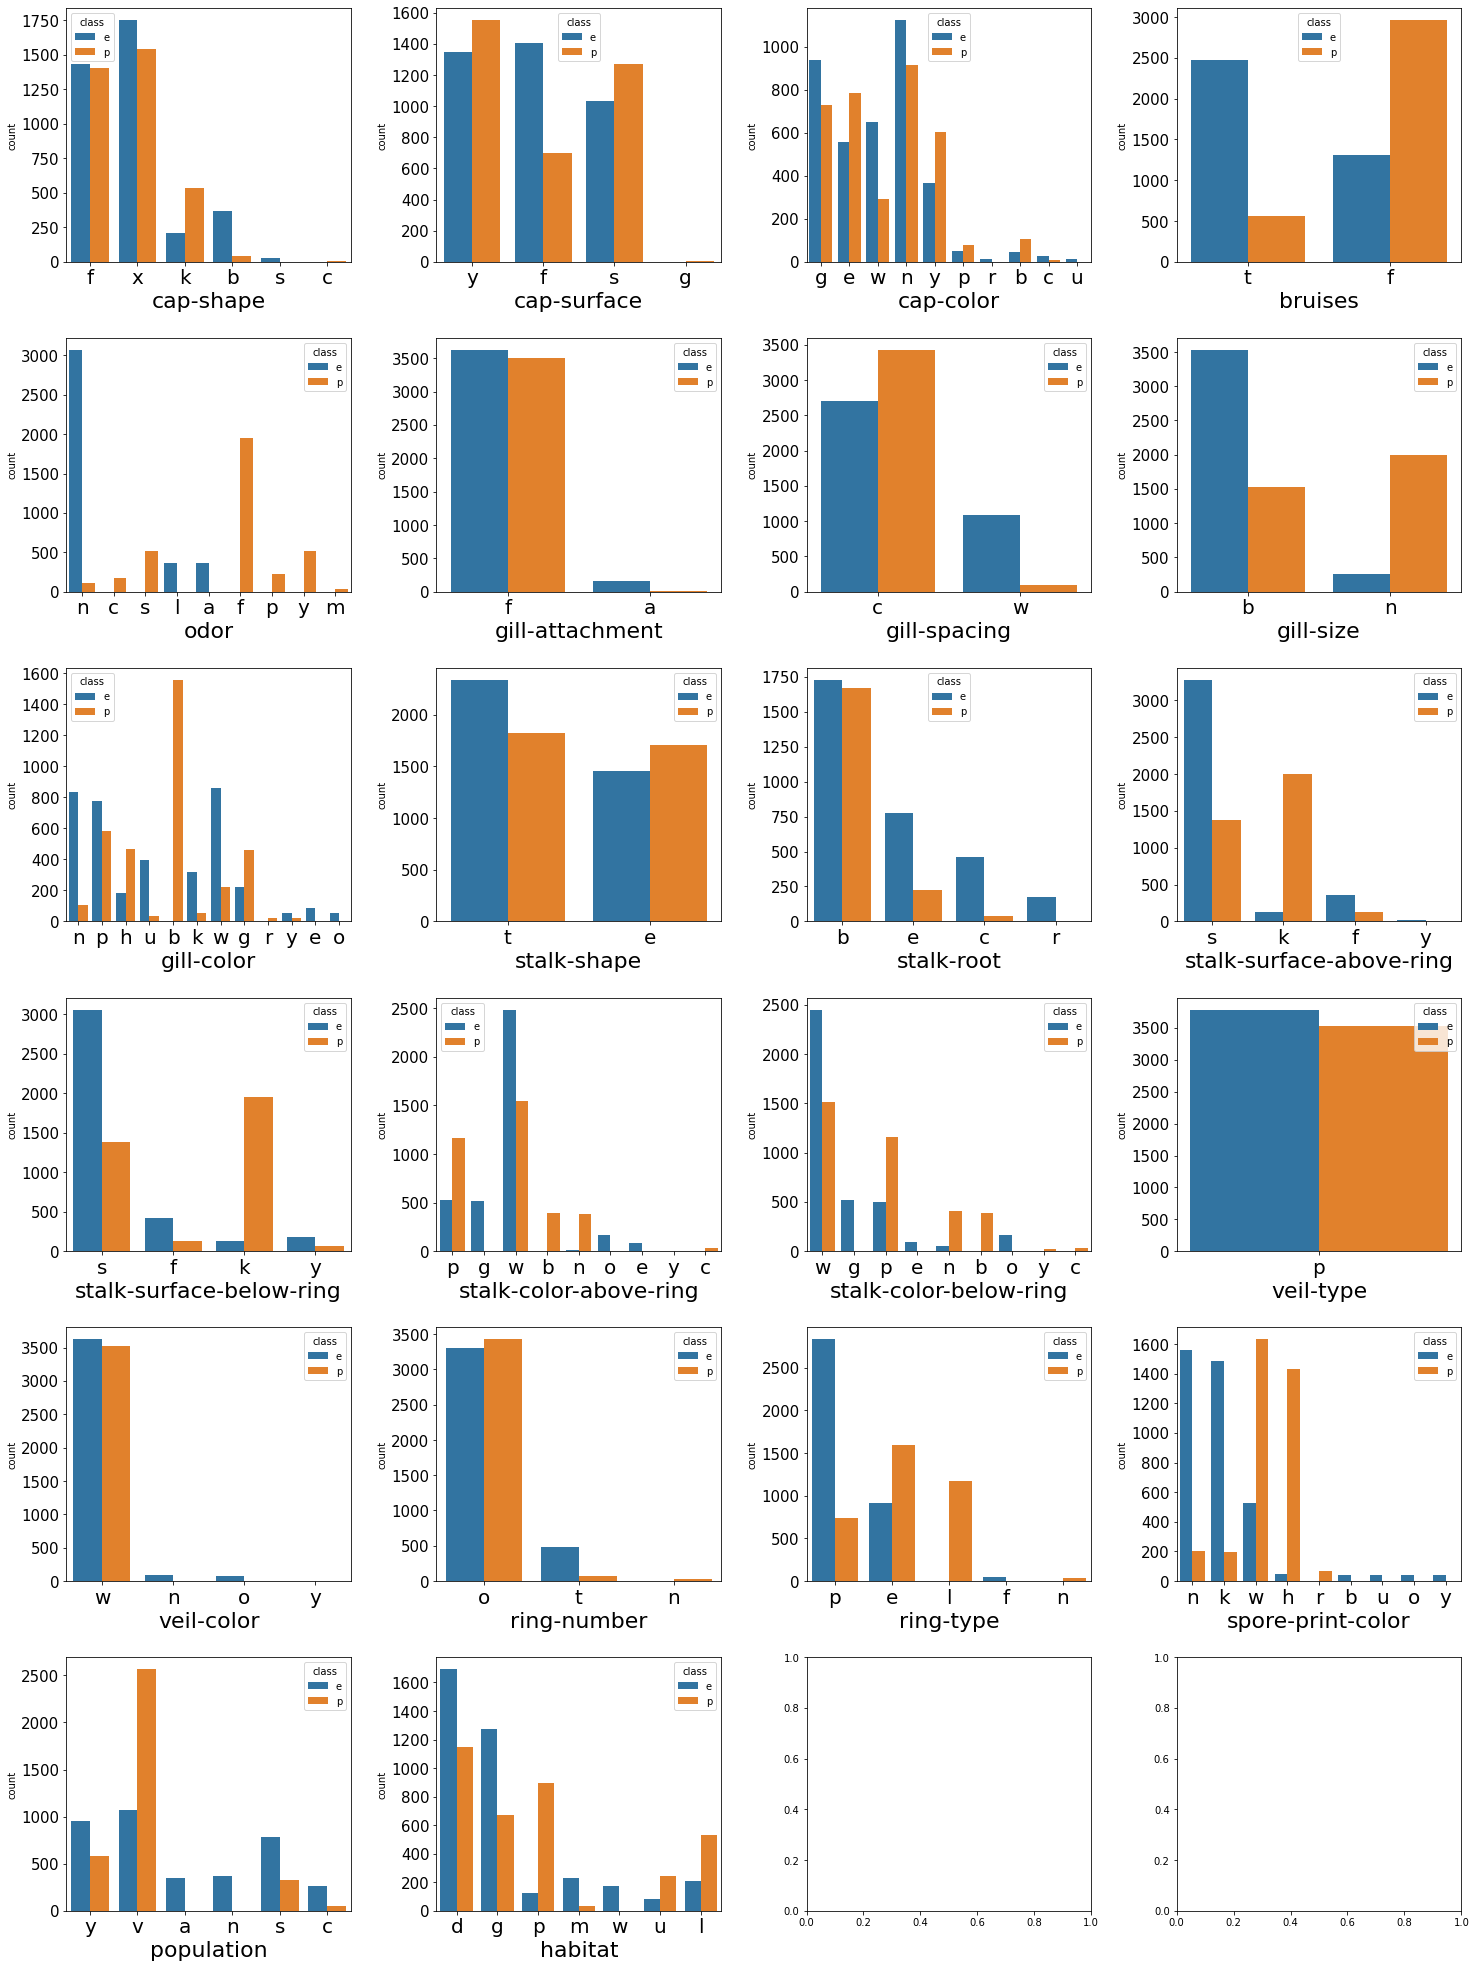

In [12]:
fig, axs = plt.subplots(6, 4, figsize = (25, 35))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for ix in range(len(df_train.columns[1:])):
    col = df_train.columns[ix + 1]
    ax = axs.flat[ix]
    
    sns.countplot(x=df_train[col], hue=df_train["class"], ax=ax)
    
    label = ax.xaxis.get_label()
    ax.set_xlabel(label.get_text(), fontsize=22)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)

**Based on plots and some research choose these predictors:**

In [13]:
# include_cols = ["bruises", "odor", "gill-size", "gill-color"]
include_cols = ["bruises", "odor", "gill-size", "gill-color", "stalk-shape", "cap-color", "population", "habitat"]

In [14]:
simple_imp = SimpleImputer(strategy="most_frequent")

df_imp = simple_imp.fit_transform(df_train)
df_train = pd.DataFrame(df_imp, columns=df_train.columns)


trans_pips = []

for col in include_cols:
    trans_pips.append( (col, OneHotEncoder(categories=[df_mushrooms[col].unique()]), [col]) )

col_trans = ColumnTransformer(trans_pips)
target_trans = OneHotEncoder(categories=[["p", "e"]], drop="first", sparse=False)

**p = 0, e = 1**

In [15]:
y_train = df_train["class"]
X_train = df_train.drop(["class"], axis=1)

y_test = df_test["class"]
X_test = df_test.drop(["class"], axis=1)

df_imp = simple_imp.fit_transform(X_test)
X_test = pd.DataFrame(df_imp, columns=X_test.columns)


X_trans = col_trans.fit_transform(X_train)
y_trans = target_trans.fit_transform(y_train.to_numpy().reshape(-1,1))
y_trans = y_trans.flatten()

logreg = LogisticRegression()
logreg.fit(X_trans, y_trans)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
target_trans.categories_

[array(['p', 'e'], dtype=object)]

In [17]:
X_trans = col_trans.fit_transform(X_test)
y_trans = target_trans.fit_transform(y_test.to_numpy().reshape(-1,1))
y_trans = y_trans.flatten()

pred = logreg.predict(X_trans)

accuracy_score(y_trans, pred)

0.997539975399754

In [18]:
confusion_matrix(y_trans, pred)

array([[390,   2],
       [  0, 421]])

**A few falsely classified as edible.**
In this scenario one want to tolerate only false negatives rather than false positives (you don't want to risk eating a poisonous mushroom). **&rarr; increase precision.**

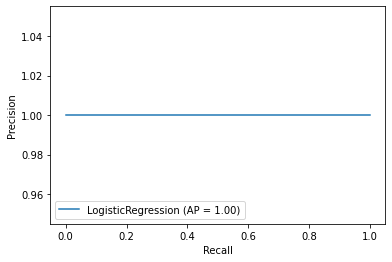

In [23]:
plot_precision_recall_curve(logreg, X_trans, y_trans)

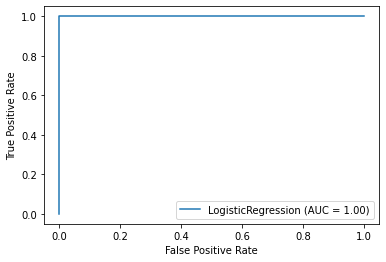

In [19]:
plot_roc_curve(logreg, X_trans, y_trans)

In [20]:
pred_proba = logreg.predict_proba(X_trans)

thresh = 0.6
pred = pred_proba[:, 1] > thresh
confusion_matrix(y_trans, pred)

array([[392,   0],
       [  0, 421]])